<a href="https://www.kaggle.com/code/shubhamgupta012/eda-on-heart-disease-dataset?scriptVersionId=133410079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart_statlog_cleveland_hungary_final.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [6]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
df.duplicated().sum()

272

In [8]:
df.shape

(1190, 12)

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [10]:
df[df.duplicated() == True]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.shape

(918, 12)

In [13]:
df.duplicated().sum()

0

In [14]:
df['age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: age, dtype: int64

In [15]:
df['sex'].value_counts()

1    725
0    193
Name: sex, dtype: int64

In [16]:
df['chest pain type'].value_counts()

4    496
3    203
2    173
1     46
Name: chest pain type, dtype: int64

In [17]:
df['resting ecg'].value_counts()

0    552
2    188
1    178
Name: resting ecg, dtype: int64

In [18]:
df['ST slope'].value_counts()

2    459
1    395
3     63
0      1
Name: ST slope, dtype: int64

In [19]:
df['exercise angina'].value_counts()

0    547
1    371
Name: exercise angina, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='chest pain type'>

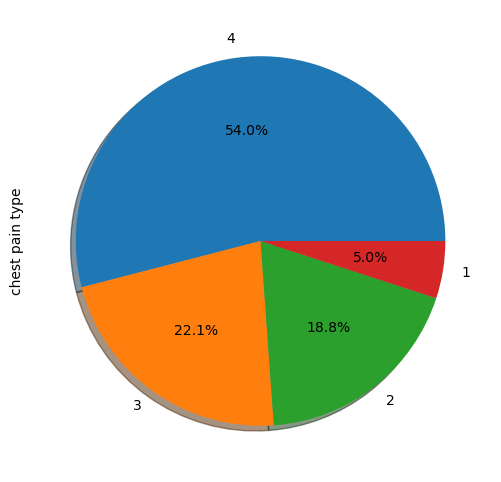

In [21]:
plt.figure(figsize=(15,6))
df['chest pain type'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')

<Axes: ylabel='resting ecg'>

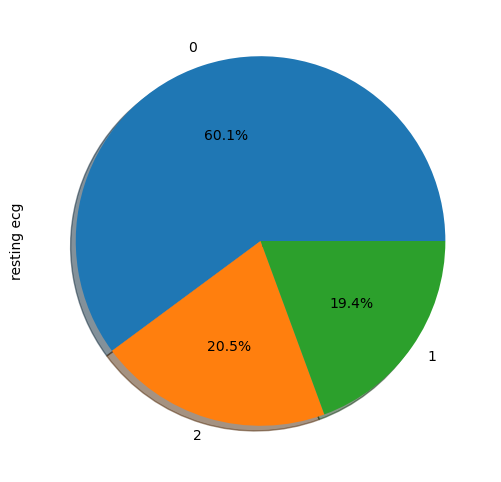

In [22]:
plt.figure(figsize=(15,6))
df['resting ecg'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')

<Axes: ylabel='fasting blood sugar'>

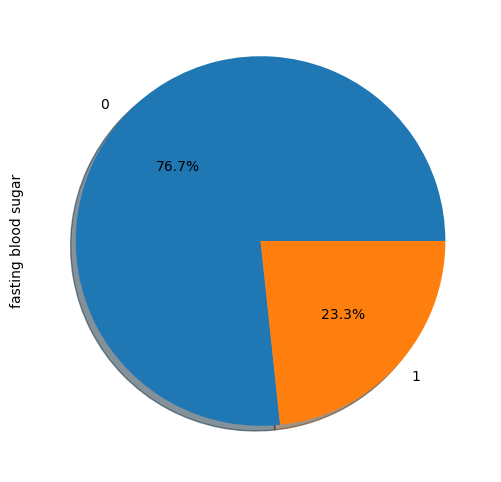

In [23]:
plt.figure(figsize=(15,6))
df['fasting blood sugar'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')

<Axes: ylabel='ST slope'>

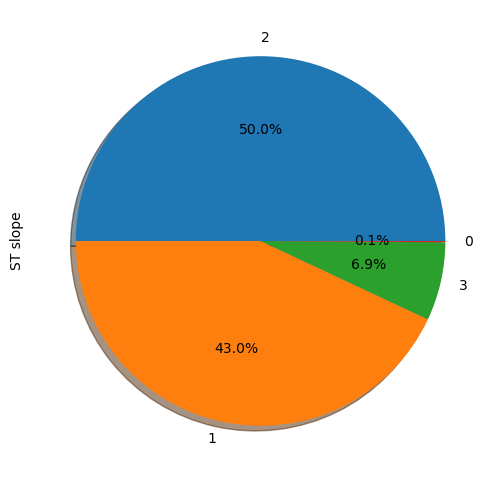

In [24]:
plt.figure(figsize=(15,6))
df['ST slope'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')

/tmp/ipykernel_20/2062954179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'])


<Axes: xlabel='sex', ylabel='Density'>

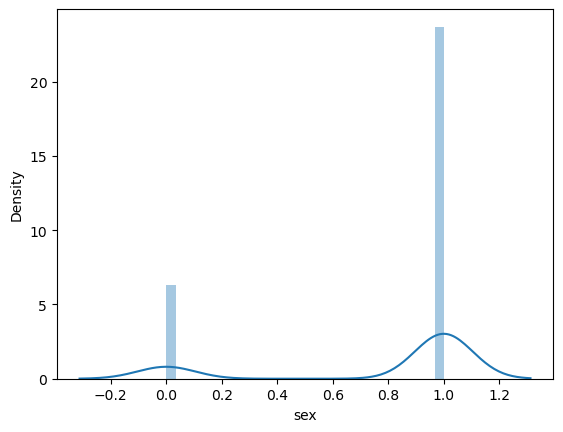

In [25]:
sns.distplot(df['sex'])

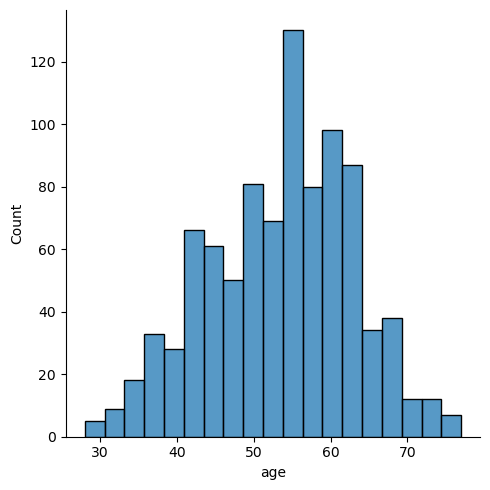

In [26]:
sns.displot(df['age'])

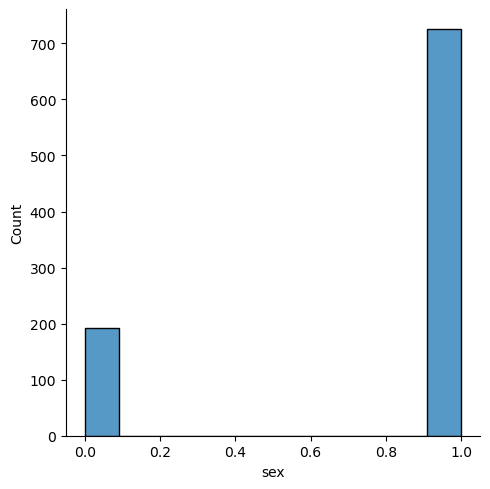

In [27]:
sns.displot(df['sex'])

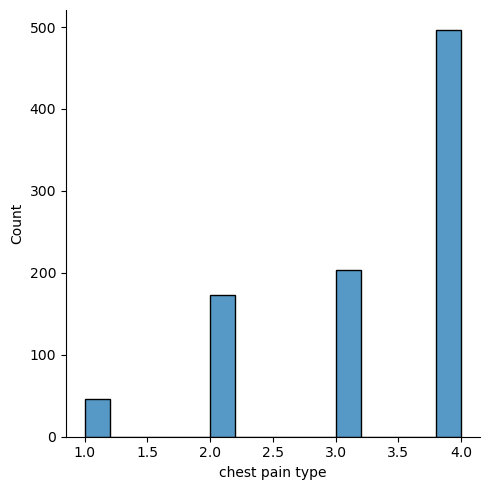

In [28]:
sns.displot(df['chest pain type'])

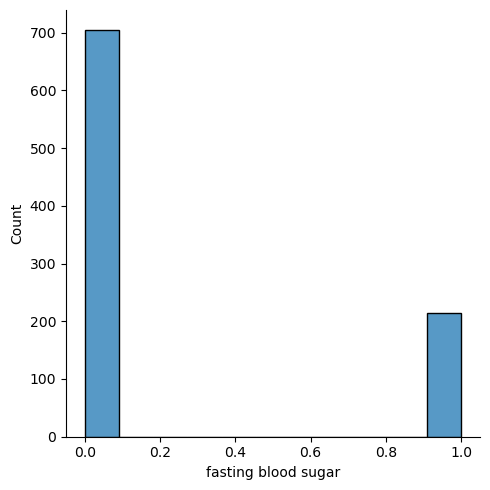

In [29]:
sns.displot(df['fasting blood sugar'])

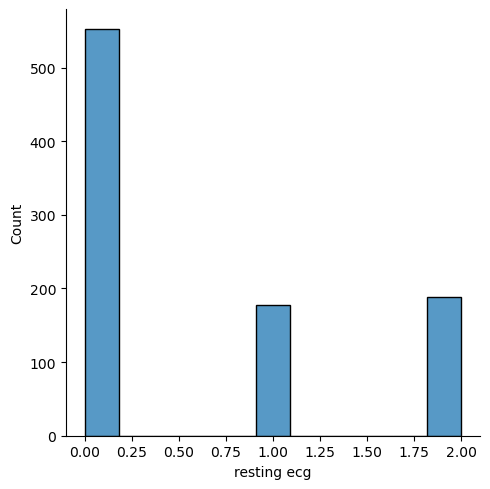

In [30]:
sns.displot(df['resting ecg'])